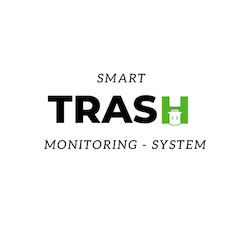

| Project name   |  Smart Trash Monitoring System - STM-SYS |
|:----------|:-------------|
| **Autor(S)**| student 1 T031973, Jorge Axel Cruz Jimenez<br>student 2 T027292, David Eliseo Roldan Machado<br> student 3 T033229, Gabriela Sanchez Alcaraz |
| **Editor**|Dr. Adán Hirales Carbajal|
| **Last update** | November 30th, 2022 |

### <span style="color:blue">Problem statement</span>

This will be a Smart Monitoring Trash System that will receive a signal everytime a trash is thrown into the trashcan. The ultrasonic jsn-sr04t sensor will determine the distance between the bottom of the container and the sensor; in order that when the sensor detects that the distance is bellow "certain centimiters" it will mean that the trash can is full and it is time to notify the user

### <span style="color:blue">Hardware requirements</span>


|Component|Quantity|Characteristics|Component|
|:---|:---|:-----|:---:|
|STM32 F413ZHT6|1| Development board|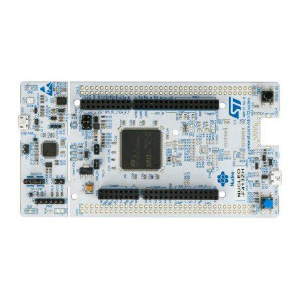|
|WiFi Module ESP-8266 |1| 802.11bgn-capable 20MHz WiFi Module with I/O Operating voltage of 2.7V to 3.6V.<br>Operating temperature range of -40°C to +85°C |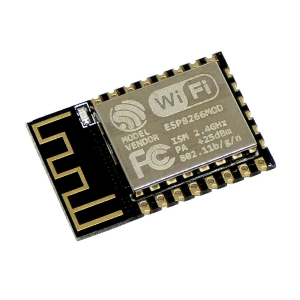|
|JSN-SR04T| 1| Utrasonic distance measurement module.<br>Serial Output with operating voltage DC 3.0-5.5V with probe frequency of 40KHz.<br>Operating temperature of -20°C to +70°C|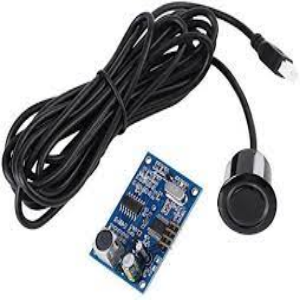|



### <span style="color:blue">hardware schematic</span>

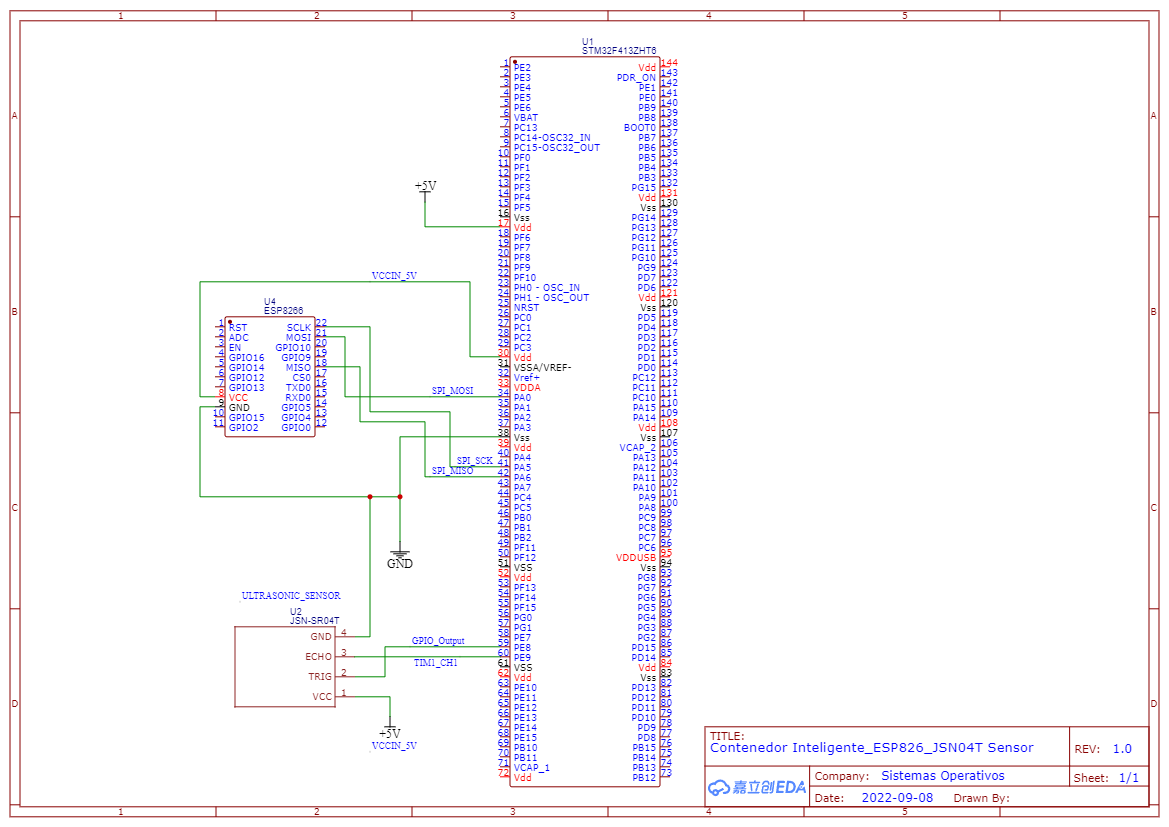

### <span style="color:blue">Hardware layout</span>

| Pin |Description |
|:--:|:--:|
|PD9|USART3_RX|
|PD8 |USART3_TX|
|PA7,GPIO_Input |Green - Echo in ultrasonic sensor| 
|PD14: GPIO_Output|Orange - Trigger in ultrasonic sensor|
|STM32 GND|GND | 
|STM32 +5V | VCC in|
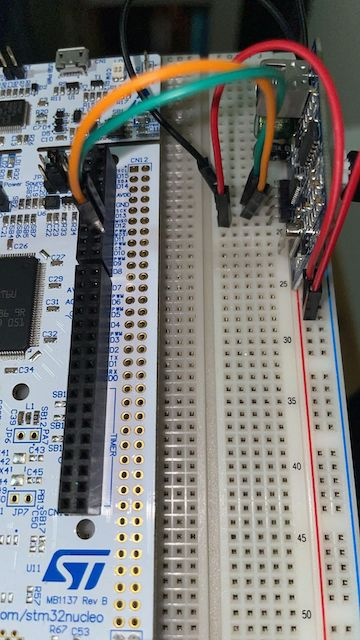





### <span style="color:blue">Static/dynamic model</span>

Two diagrams are required:
- **Static model**

The static diagram ilustrates all physical and logical entities that the solution integrates.

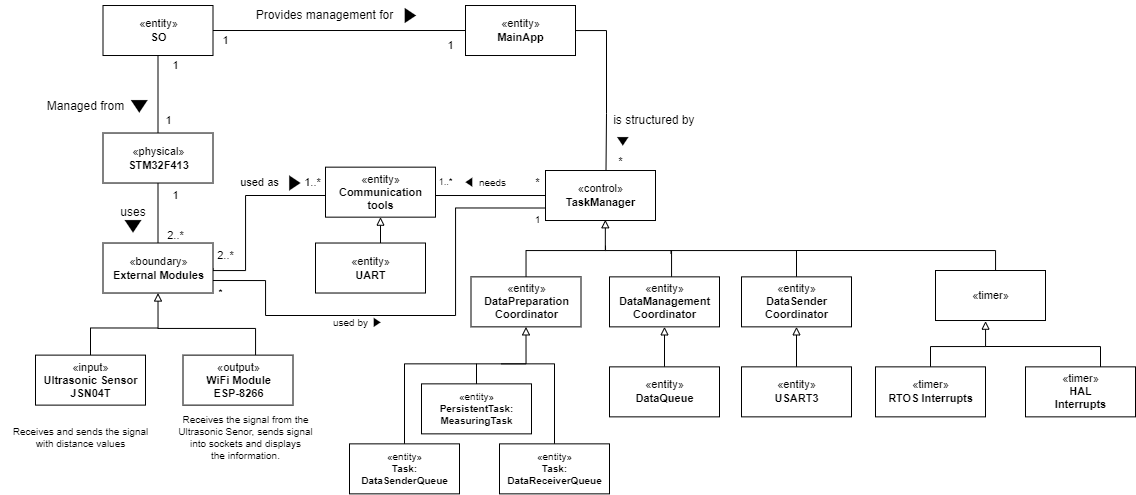




- **Collaborative model**



The collaborative design ilustrates how the entities colaborate and exchange messages.

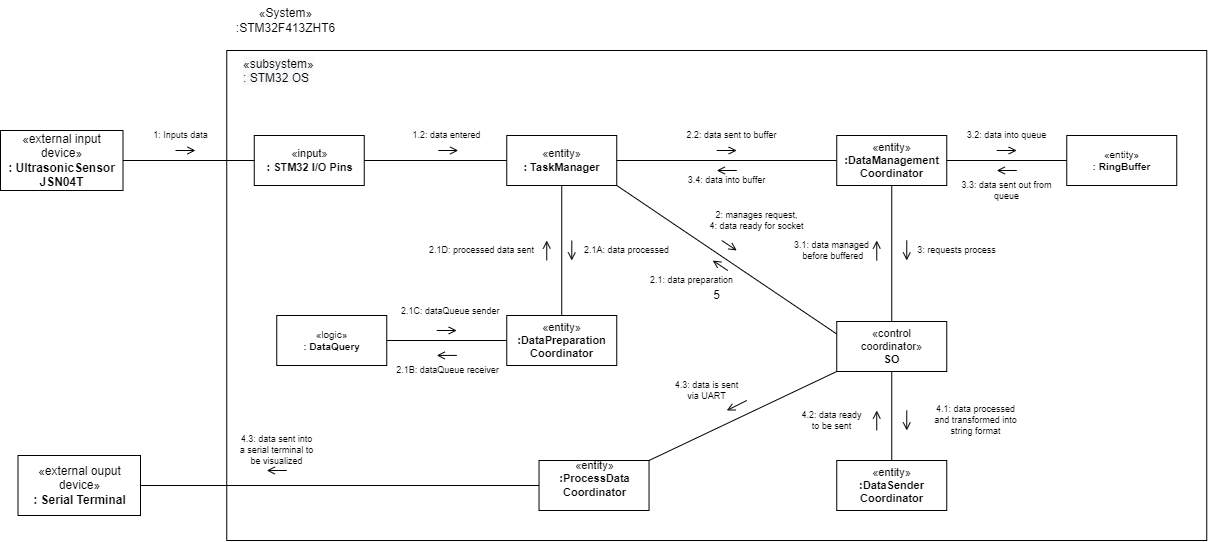

### <span style="color:blue">OS and workload requirements</span>
### <span style="color:blue">CubeMX parameters</span>


Project is according to the STM32 board model used, STM32F413ZHT6. System clock and timer frequencies are set as follow: Input frequency is set 25 Mhz using PLL Source Mutex as HSI and the System clock mutex is set to PLLCLK at a frequency of 72 Mhz. This is, the Prescalar is set to 72 which divides the APB clock by 72 and bring the timer clock to 1 Mhz also the module automatically sends 8 40kHz square waves and detects whether there is a signal to return. This necessary becasuse the ultrasonic sensor JSN04T sends the signal in microseconds (referenced in the JSN04T datasheet pdf under project folder "assets"). STM32 pins PA7 and PD14 are assigned to I/O ultrasonic sensor JSN04T and pins PA0 to SPI MOSI, PA5 to SPI SCK and PA6 to SPI MISO these for communicating with the WiFi Module ESP8266.

Additionally, to visualize the data received by the ultrasonic sensor, we are using a communication protocol, which is UART. For this, USART3 is established as the parameters, and using STM32 pins PD8 and PD9 for such communication, this is because the STM32-F413ZHT6 uses this pins and UART instance number 3 to establish serial communication.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border-color:#999;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:#999;color:#444;background-color:#F7FDFA;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:#999;color:#fff;background-color:#26ADE4;}
.tg .tg-c3ow{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-fymr{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <caption>Table III. Solution 1 specification</caption>
  <tr>
    <th class="tg-fymr" colspan="2">Class</th>
    <th class="tg-fymr" colspan="2">Attribute</th>
    <th class="tg-fymr" colspan="3">Value</th>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"><b>Project</b></td>
    <td class="tg-c3ow" colspan="2">Name</td>
    <td class="tg-c3ow" colspan="3">F413ZHT6_STM-SYS</td>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"></td>
    <td class="tg-c3ow" colspan="2">Clock</td>
    <td class="tg-c3ow" colspan="3">72Mhz</td>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"></td>
    <td class="tg-c3ow" colspan="2">Timebase source</td>
    <td class="tg-c3ow" colspan="3">TIM1</td>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"><b>STM32 Pins</b></td>
      <td class="tg-c3ow" colspan="2"><span style="color:red">PA7, PD14, PA3 and PA2</span></td>
    <td class="tg-c3ow" colspan="3"><span style="color:red">Set PA7 to GPIO_Input and PD14 to GPIO_Output, // Set PD8 to USART3_TX and PD9 to USART3_RX for communication</span></td>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2"><b>FreeRTOS</b></td>
    <td class="tg-c3ow" colspan="2">API</td>
    <td class="tg-c3ow" colspan="3">CMSIS v1</td>
  </tr>
 <tr>
    <td class="tg-fymr"><b>Task/interrupt</b></td>
    <td class="tg-fymr"><b>Type</b></td>
    <td class="tg-fymr"><b>Name</b></td>
    <td class="tg-fymr"><b>Entry function</b></td>
    <td class="tg-fymr"><b>$w_j$</b></td>
    <td class="tg-fymr"><b>$p_j$</b></td>
    <td class="tg-fymr"><b>Port</b></td>
  </tr>
  <tr>
      <td class="tg-fymr">1</td>
      <td class="tg-fymr">Persistent</td>
      <td class="tg-fymr">measurinTask</td>
      <td class="tg-fymr"><span style="color:red">measuringTask_init</span></td>
      <td class="tg-fymr">osPriorityNormal</td>
      <td class="tg-fymr"></td>
      <td class="tg-fymr">PA7 & PD14</td>
  </tr>
  <tr>
      <td class="tg-fymr">2</td>
      <td class="tg-fymr">Interrupt</td>
      <td class="tg-fymr">task1</td>
      <td class="tg-fymr"><span style="color:red">task1_init</span></td>
      <td class="tg-fymr">osPriorityNormal</td>
      <td class="tg-fymr"></td>
      <td class="tg-fymr"></td>
   </tr>
   <tr>
      <td class="tg-fymr">3</td>
      <td class="tg-fymr">Interrupt</td>
      <td class="tg-fymr">task2</td>
      <td class="tg-fymr"><span style="color:red">task2_init</span></td>
      <td class="tg-fymr">osPriorityBelowNormal</td>
      <td class="tg-fymr"></td>
      <td class="tg-fymr"></td>
   </tr>
</table>


# <span style="color:blue">Software components</span>

## Implementation

#### Global Variables and define the pins

Global variables are used along the program, and also used outside functions, so they have to be declared as global. The following variables are considered:

```
#define TRIG_PIN GPIO_PIN_14
#define TRIG_PORT GPIOD
#define ECHO_PIN GPIO_PIN_7
#define ECHO_PORT GPIOA
uint32_t pMillis;
uint32_t Value1 = 0;
uint32_t Value2 = 0;
int Distance  = 0;  // cm
uint8_t buffer[10]; //needed to send data to serial communication
```

The value1 and value2 variables are used in the function to calculate the distance, those are used by a persistent task that is constantly measuring the distance using the ultrasonic sensor

#### Tasks and Queue Declaration

There are two main tasks that are defined using RTOS, so the system can work on its own using persistent tasks and sending the data to a serial port so the data is visualized in a serial terminal.

We also defined a queue to handle the data that is received by the sensor and then is sent to the serial terminal to be visualized.

```
/* Create the queue(s) */

  /* definition and creation of DataQueue */
  osMessageQDef(DataQueue, 16, uint16_t);
  DataQueueHandle = osMessageCreate(osMessageQ(DataQueue), NULL);


/* Create the thread(s) */

  /* definition and creation of defaultTask */
  osThreadDef(defaultTask, StartDefaultTask, osPriorityNormal, 0, 128);
  defaultTaskHandle = osThreadCreate(osThread(defaultTask), NULL);

  /* definition and creation of receiveTask */
  osThreadDef(receiveTask, receiveTask_init, osPriorityNormal, 0, 128);
  receiveTaskHandle = osThreadCreate(osThread(receiveTask), NULL);
```

#### Setting up the pins

The function "MX_GPIO_Init" enables and sets all needed pins to an initially deasserted state, so that they can be used in the rest of the program.

```
C
static void MX_GPIO_Init(void)
{
  GPIO_InitTypeDef GPIO_InitStruct = {0};

  /* GPIO Ports Clock Enable */
  __HAL_RCC_GPIOH_CLK_ENABLE();
  __HAL_RCC_GPIOA_CLK_ENABLE();
  __HAL_RCC_GPIOD_CLK_ENABLE();

  /*Configure GPIO pin Output Level */
  HAL_GPIO_WritePin(GPIOD, GPIO_PIN_14, GPIO_PIN_RESET);

  /*Configure GPIO pin Output Level */
  HAL_GPIO_WritePin(GPIOC, GPIO_PIN_0|GPIO_PIN_3, GPIO_PIN_RESET);

  /*Configure GPIO pin : PA7 */
  GPIO_InitStruct.Pin = GPIO_PIN_7;
  GPIO_InitStruct.Mode = GPIO_MODE_INPUT;
  GPIO_InitStruct.Pull = GPIO_NOPULL;
  HAL_GPIO_Init(GPIOA, &GPIO_InitStruct);

  /*Configure GPIO pin : PD14 */
  GPIO_InitStruct.Pin = GPIO_PIN_14;
  GPIO_InitStruct.Mode = GPIO_MODE_OUTPUT_PP;
  GPIO_InitStruct.Pull = GPIO_NOPULL;
  GPIO_InitStruct.Speed = GPIO_SPEED_FREQ_LOW;
  HAL_GPIO_Init(GPIOD, &GPIO_InitStruct);

}
```

# Main Functions

The main functions initialized all settings needed for the system to work properly. This goes from initializing the pins, the functions that handle the data and the RTOS initialization.

```
int main(void)
{
  HAL_TIM_Base_Start(&htim2);
  HAL_GPIO_WritePin(TRIG_PORT, TRIG_PIN, GPIO_PIN_RESET);  // pull the TRIG pin low
}
```

The trigger pin has to be pull to low so the measurements can be initialize later in the function.

#### Receiving and updating data: Measuring Distance

This task is the main task of the program and it is set to be in a infinite loop in the program as it is a persistent task. This task works with the pin configuration set in the main function so the pin that reads the signals of the ultrasonic sensor is initialized. The pin is first pulled to low so it is ready to receive signals, after that the trigger pin is pulled high so it receives the signal and gets the data and the it has to wait for 20 micro seconds, the ultrasonic sensor JSN-SR04T manufacter configuration, after that the pin is pull to low again. With this, we use a variable to save a tick that it is used for timeout, and then wait for the echo pin to go high and save the tick value.
This is repeated so we get two tick values and used in the distance formula. The distance formula is standard, uses the diference in the two ticks values, this means that use the value when the signal is out of the sensor and the signal returns to the sensor, so the use the difference between those values and multiply that by the average speed of sound. Then it is divided by 2 so we get the value in centimeters. The we store and send every measurement to the back of a queue to be handled.  
After every measurement the task yields control to other task that handles the data management and prepares it to be visualized.

```
void StartDefaultTask(void const * argument)
{
  /* USER CODE BEGIN 5 */
  /* Infinite loop */
	BaseType_t xStatus;

  for(;;)
  {
	  //distance formula for sensor JSN-04T
		HAL_GPIO_WritePin(TRIG_PORT, TRIG_PIN, GPIO_PIN_SET);  // pull the TRIG pin HIGH
		__HAL_TIM_SET_COUNTER(&htim2, 0);
		while (__HAL_TIM_GET_COUNTER (&htim2) < 20);  // wait for 20 us
		HAL_GPIO_WritePin(TRIG_PORT, TRIG_PIN, GPIO_PIN_RESET);  // pull the TRIG pin low

		pMillis = HAL_GetTick(); // used this to avoid infinite while loop  (for timeout)
		// wait for the echo pin to go high
		while (!(HAL_GPIO_ReadPin (ECHO_PORT, ECHO_PIN)) && pMillis + 10 >  HAL_GetTick());
		Value1 = __HAL_TIM_GET_COUNTER (&htim2);

		pMillis = HAL_GetTick(); // used this to avoid infinite while loop (for timeout)
		// wait for the echo pin to go low
		while ((HAL_GPIO_ReadPin (ECHO_PORT, ECHO_PIN)) && pMillis + 50 > HAL_GetTick());
		Value2 = __HAL_TIM_GET_COUNTER (&htim2);

		Distance = (Value2-Value1)* 0.034/2;
		HAL_Delay(50);

		xStatus = xQueueSendToBack(DataQueueHandle, &Distance, 0);

		taskYIELD();
  }
}
```

#### Receiving and updating data to Queue

This task takes control after every measurement, so after every measurementm, the data is managed and sent it to a queue. Here we need to transform the data received into a string format, so it can be managed and sent via UART, which also uses a global buffer so it can be sent as character per character format into a serial terminal to be visualized.  
In this task a variable is declared so it can get the distance value sent by the measuring task, and also a variable to store the ticks it is necessary to update the status of the queue by the value of those ticks, because of the interrupts. Then in a infinite loop, the data is stored and received in the queue and then every character of the data is transformed into string format and store in a buffer so it can be sent via UART into a serial terminal to be visualized.  
Finally, the task yields control back to the measuring task so it can start again another mesurement and repeat this process.

```
void receiveTask_init(void const * argument)
{
  /* USER CODE BEGIN receiveTask_init */
  /* Infinite loop */

	uint32_t value = 0;
	BaseType_t xStatus;
	const TickType_t xTicksToWait = pdMS_TO_TICKS(100);

  for(;;)
  {
	xStatus = xQueueReceive(DataQueueHandle, &value, xTicksToWait);
	sprintf(buffer, "%i cm\r\n", value); // @suppress("Float formatting support")
	HAL_UART_Transmit(&huart3, buffer, sizeof(buffer), 100);
    taskYIELD();
  }
}
```

# **References**

1. FreeRTOS. (2022). Queue Management. https://www.freertos.org/a00018.html

2. FreeRTOS. (2022). Semaphores. https://www.freertos.org/a00113.html

3. FreeRTOS. (2022). Task Control. https://www.freertos.org/a00112.html

4. STMicroelectronics. (2020). UM1974 User manual. STM32 Nucleo-144 boards (MB1137) https://drive.google.com/file/d/1S6hjZu_6k5-xtig2-4RWoy4vuPnUV0gj/view?usp=sharing

5. TT Electronic. (2019). Rotary Potentiometer P160 Series https://drive.google.com/file/d/1safhZWP4hK1Ilp4WD5VxY0KaoLWx3ulT/view?usp=sharing
